## Exploding and Vanishing Gradients

Backpropagation functions by moving from the output layer back to the input layer, carrying the error gradient along its path. After determining the gradient of the cost function relative to each network parameter, it employs these gradients for updating each parameter through a gradient descent step. However, a common issue is that these gradients often diminish as backpropagation approaches the lower layers, leading to insignificant changes in the weights of these layers and impeding the model's ability to find a good solution. This phenomenon is known as the _vanishing gradients_ problem. Conversely, the gradients might sometimes escalate, causing excessively large updates to the layer weights and leading the algorithm to diverge, known as the _exploding gradients_ problem. This issue is particularly prevalent in recurrent neural networks. Generally, deep neural networks face the challenge of unstable gradients, where layers can learn at significantly different rates.

In summary:
   - **Vanishing Gradients:** Occur when gradients become very small, effectively preventing the weights from changing their value during training. Common in deep networks with many layers.
   - **Exploding Gradients:** Happen when gradients grow exponentially large, causing large updates to neural network weights during training, often leading to model instability.

Deep neural networks (DNNs) fell out of favor in the early 2000s, primarily due to the instability of gradients during training, a phenomenon not well-understood at the time. The breakthrough came in a [2010 paper](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) by Xavier Glorot and Yoshua Bengio, which shed light on the causes of this issue.

They identified key factors contributing to unstable gradients in DNNs:

1. **Activation Function:** The widely used sigmoid (logistic) activation function was problematic. This function saturates at 0 or 1 for large positive or negative inputs, leading to an extremely small derivative in these regions. Consequently, during backpropagation, these small gradients provided very little information for updating weights in the earlier layers.

2. **Weight Initialization:** The common practice of initializing weights with a standard normal distribution (mean of 0 and standard deviation of 1) exacerbated the problem. Glorot and Bengio found that this approach led to a situation where the variance of each layer's outputs was significantly greater than that of its inputs. As a result, the further the network propagated, the more the output variance increased, causing the upper layers to saturate.

3. **Mean of Sigmoid:** The sigmoid function has a mean of 0.5, not 0, worsening the saturation in deep layers compared to functions like the hyperbolic tangent, which has a mean of 0 and thus performs slightly better in deep networks.

In essence, due to the sigmoid activation function and the then-popular weight initialization method, the gradients during backpropagation were either too small to make meaningful updates to lower layer weights or too large, leading to saturation at the upper layers. This understanding paved the way for the development of more effective initialization methods and activation functions for deep neural networks.


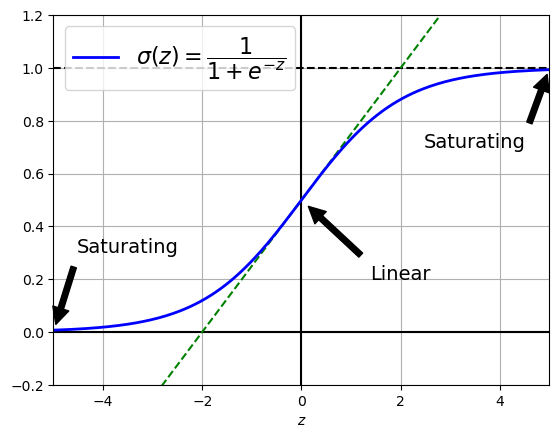

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, sigmoid(z), "b-", linewidth=2,
         label=r"$\sigma(z) = \dfrac{1}{1+e^{-z}}$")
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props,
             fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props,
             fontsize=14, ha="center")
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.xlabel("$z$")
plt.legend(loc="upper left", fontsize=16)

plt.show()


#### Addressing the Problem: Initialization Strategies


In their paper, Glorot and Bengio introduced a solution to significantly reduce the problem of unstable gradients in neural networks. They emphasized the importance of maintaining a consistent flow of signals both when making predictions (forward direction) and when backpropagating gradients (reverse direction). For effective learning, it's crucial to prevent the signal from diminishing or becoming excessively large and saturating.

To achieve this, they suggested that the variance of a layer’s outputs should be equal to the variance of its inputs. Additionally, the gradients should maintain consistent variance when moving through the layer in reverse during backpropagation. Although it's challenging to meet both conditions simultaneously unless a layer has the same number of input and output connections (referred to as fan-in and fan-out), Glorot and Bengio proposed a practical compromise. They recommended initializing the weights of each layer randomly based on a formula that considers the average of the fan-in and fan-out of the layer. This approach, known as Xavier or Glorot initialization, has been highly effective in practice and is widely used in deep learning for initializing neural network weights.

| **Initialization** | **Activation functions** | $\mathbf{\sigma^2}$ |
| -------------------| ------------------------ | --------------------|
| Xavier Glorot      | None, tanh, sigmoid softmax| $ 1/fan_{avg} $   |
| Kaiming He         | ReLU, Leaky ReLU, ELU, GELU, Swish, Mish |   $ 2 /fan_{in} $ |
| Yann LeCun         | SELU |   $ 1 /fan_{in} $ |

By default, Keras uses Glorot initialization with a uniform distribution.  You can change this to He initialization by using `he_normal` or `he_uniform`:

<div style="padding-left: 40px">

~~~python
import tensorflow as tf
dense = tf.keras.layers.Dense(50, activation="relu",kernel_initializer="he_normal")
~~~

</div>

You can use any of the initializations shown in the preceding table by using the `VarianceScaling` initializer, as follows:

<div style="padding-left: 40px">

~~~python
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
dense = tf.keras.layers.Dense(50, activation="sigmoid", kernel_initializer=he_avg_init)
~~~

</div>

### Activation Functions

#### ReLU and its variants

In their 2010 paper, Glorot and Bengio highlighted that unstable gradients in deep neural networks were partially due to the choice of activation function. While sigmoid functions are found in biological neurons, they discovered that other functions, particularly the ReLU (Rectified Linear Unit), are more effective in deep learning. ReLU is advantageous because it does not saturate for positive values and is computationally efficient.



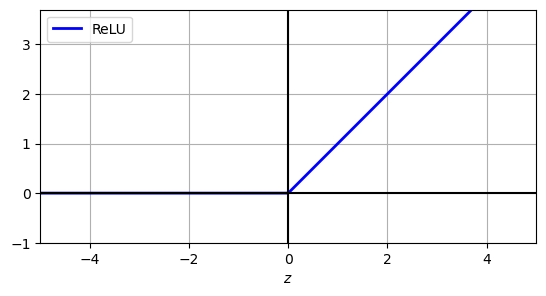

In [2]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0), "b-", linewidth=2, label=r"ReLU")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)

plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()




However, ReLU is not without flaws. It can suffer from the "dying ReLUs" problem, where neurons become inactive and only output zero. This occurs when a neuron's weights adjust so that its input is negative for all training instances, leading to zero output and no gradient updates. This issue is especially prevalent with large learning rates, potentially resulting in a significant portion of the network becoming inactive.

To address this, variations of ReLU, such as the leaky ReLU, have been proposed. The leaky ReLU is defined as `LeakyReLUα(z) = max(αz, z)`, where α is a small, positive slope for z < 0. This modification ensures that leaky ReLUs maintain some activity, preventing them from "dying". Research by Bing Xu et al. in 2015 found that leaky ReLU variants generally outperform the standard ReLU. Interestingly, a larger α (e.g., 0.2) often yields better results than a smaller one (e.g., 0.01).

The study also explored randomized leaky ReLU (RReLU), where α varies within a range during training and is fixed during testing. RReLU showed good performance and seemed to provide regularization benefits. Another variant, the parametric leaky ReLU (PReLU), allows α to be learned during training. PReLU showed superior performance on large image datasets but might overfit on smaller datasets.

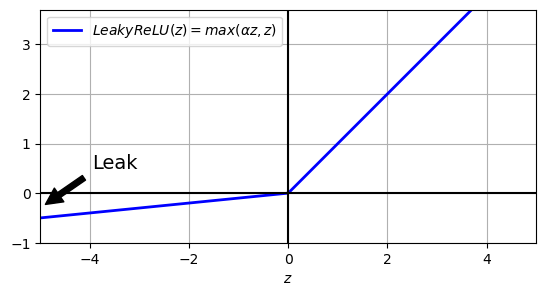

In [3]:
def leaky_relu(z, alpha):
    return np.maximum(alpha * z, z)

z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.1), "b-", linewidth=2, label=r"$LeakyReLU(z) = max(\alpha z, z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-1, 3.7], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.3), arrowprops=props,
             fontsize=14, ha="center")
plt.xlabel("$z$")
plt.axis([-5, 5, -1, 3.7])
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

In Keras, you can use LeakyReLu and PReLU from the layers package.  Note that with ReLU variants, you should use He initialization:

<div style="padding-left:40px">

~~~python
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2) # defaults to alpha=0.3
dense = tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer="he_normal")
~~~
</div>

You can also incorporate an activation function as a separate layer, e.g.; 

<div style="padding-left:40px">

~~~python
model = tf.keras.models.Sequential([
    [...] # more layers
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"), #no activation
    tf.keras.layers.LeakyReLU(alpha=0.2), # activation as a separate layer
    [...] # more layers
])
~~~
</div>





Technically, these two methods achieve the same end result, but there are subtle differences in their usage and implications.

### Applying Activation as Part of a Layer

1. **Direct Integration:**
   - Activation functions can be directly integrated into layers like `Dense` or `Conv2D` through the `activation` parameter.
   - Example: `Dense(64, activation='relu')`.
   - This approach is concise and commonly used for standard layer types.

2. **Benefits:**
   - Simplicity and readability, as it combines both the linear transformation and the non-linear activation into a single line of code.
   - Generally preferred for simplicity unless you have a specific reason to use a separate layer.

### Using a Separate Activation Layer

1. **Separate Layer:**
   - Activation functions can be applied as their own layer.
   - Example:
     ```python
     Dense(64),
     Activation('relu')
     ```
   
2. **Benefits:**
   - Flexibility: Useful in more complex architectures where you might need to perform operations between the linear transformation and the activation.
   - Clarity: In some models, explicitly separating the layers can make the model architecture more clear, especially in cases where you're doing something unusual.
   - Advanced Customization: If you need to create custom activation functions or perform conditional activations, using separate layers can be more convenient.

### Key Differences

- **Functionality:** No functional difference in terms of the computation performed – both will apply the same activation function in the same way.
- **Use Cases:** The choice often depends on the specific requirements of your model architecture and your personal coding style preference.
- **Model Serialization:** One subtle difference is in model serialization and inspection. When using separate activation layers, the model's architecture will explicitly list activations as distinct layers, which can be more transparent in some complex models.

In practice, choosing between integrated activation functions and separate activation layers is mostly a matter of preference and specific architectural needs. For most standard applications, directly integrating the activation into the layer is sufficient and more concise. However, for more complex architectures or custom activation functions, using separate activation layers can provide more flexibility and clarity.

#### ELU and SELU

One problem with ReLU and its variants is that they are not smooth functions - all have a discontinuity at z=0, and this can cause problems for gradient descent. This led to the introduction of smooth variants of ReLU, ELU and SELU.

### Exponential Linear Unit (ELU)

The Exponential Linear Unit (ELU) is an activation function used in neural networks, introduced as a way to improve upon the ReLU activation function. It is defined as:

$ \text{ELU}_\alpha(x) = 
  \begin{cases} 
   x & \text{if } x \geq 0 \\
   \alpha (e^x - 1) & \text{if } x < 0 
  \end{cases}
$

Where $ \alpha $ is a hyperparameter that controls the value to which an ELU saturates for negative net inputs.

#### Key Characteristics of ELU:

1. **Addresses Dying ReLU Problem:**
   - For negative input values, ELU becomes active and allows a small gradient, which helps to alleviate the dying ReLU problem.

2. **Computation Speed:**
   - ELU is slower to compute than ReLU and its variants because of the exponential function, especially during the training phase. However, this can be offset by faster convergence.

3. **Hyperparameter $ \alpha $:**
   - The $ \alpha $ parameter determines the value that ELU approaches as the input becomes negative large. It is usually set to 1, but can be tuned for specific applications.

4. **Keras Implementation:**
   - In Keras, ELU can be used by specifying `activation='elu'` or using `tf.keras.layers.ELU()` with an optional alpha value.

### Scaled Exponential Linear Unit (SELU)

SELU is a scaled variant of ELU that exhibits a self-normalizing property. It was introduced to induce the network to self-normalize, automatically tending towards zero mean and unit variance.

#### SELU Definition:

The SELU activation function is defined as:

$ \text{SELU}(x) = \lambda \times 
  \begin{cases} 
   x & \text{if } x \geq 0 \\
   \alpha e^x - \alpha & \text{if } x < 0 
  \end{cases}
$

Where $ \lambda $ and $ \alpha $ are predefined constants.

#### Characteristics of SELU:

1. **Self-Normalization:**
   - When used in a network with a particular architecture (specifically, a stack of dense layers), SELU automatically drives the network towards zero mean and unit variance, helping to stabilize the training process.

2. **Constraints for Self-Normalization:**
   - For SELU to maintain its self-normalizing property, several conditions need to be met:
     - The input features must be standardized.
     - The network’s architecture must be sequential.
     - The weights must be initialized with LeCun normal initialization (`'lecun_normal'` in Keras).
     - All dense layers must use SELU.

3. **Computation and Performance:**
   - SELU can be computationally more expensive than ReLU but often leads to faster convergence. This can result in overall faster training despite the higher per-epoch cost.

4. **Keras Implementation:**
   - In Keras, SELU is used by specifying `activation='selu'`, and it's important to use it with `'lecun_normal'` initializer for weights to preserve its self-normalizing properties.

Both ELU and SELU offer advantages over traditional ReLU, particularly in addressing the dying ReLU problem. SELU’s self-normalizing property makes it especially useful for deep dense networks, as it can lead to faster convergence and reduce the need for batch normalization. However, the network architecture must adhere to specific constraints to fully leverage SELU’s benefits. In contrast, ELU is a bit more flexible but does not offer the same self-normalizing benefits as SELU.

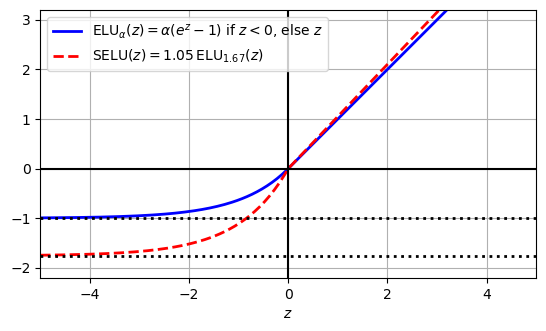

In [4]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1 / np.sqrt(2)) * np.exp(1 / 2) - 1)
scale_0_1 = (
    (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e))
    * np.sqrt(2 * np.pi)
    * (
        2 * erfc(np.sqrt(2)) * np.e ** 2
        + np.pi * erfc(1 / np.sqrt(2)) ** 2 * np.e
        - 2 * (2 + np.pi) * erfc(1 / np.sqrt(2)) * np.sqrt(np.e)
        + np.pi
        + 2
    ) ** (-1 / 2)
)

def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2, label=r"ELU$_\alpha(z) = \alpha (e^z - 1)$ if $z < 0$, else $z$")
plt.plot(z, selu(z), "r--", linewidth=2, label=r"SELU$(z) = 1.05 \, $ELU$_{1.67}(z)$")
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k:', linewidth=2)
plt.plot([-5, 5], [-1.758, -1.758], 'k:', linewidth=2)
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -2.2, 3.2])
plt.xlabel("$z$")
plt.gca().set_aspect("equal")
plt.legend()

plt.show()

### Exercise - comparing SELU and ReLU

Let's examine the performance of SELU and ReLU in the context of a deep network with 100 layers


In [27]:
import tensorflow as tf

def swish(z, beta=1):
    return z * sigmoid(beta * z)


tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# 100 hidden layers
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.005),
              metrics=["accuracy"])

Now get the data and train the network.

In [28]:
tf.keras.backend.clear_session()
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Remember to scale the inputs!
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

history = model.fit(X_train_scaled, y_train, epochs=15, batch_size = 500,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/15
110/110 [==============================] - 9s 50ms/step - loss: 2.2519 - accuracy: 0.1852 - val_loss: 2.0485 - val_accuracy: 0.2350
Epoch 2/15
110/110 [==============================] - 4s 33ms/step - loss: 1.9945 - accuracy: 0.2763 - val_loss: 1.9413 - val_accuracy: 0.3000
Epoch 3/15
110/110 [==============================] - 4s 33ms/step - loss: 1.9224 - accuracy: 0.3126 - val_loss: 1.8906 - val_accuracy: 0.3252
Epoch 4/15
110/110 [==============================] - 4s 33ms/step - loss: 1.8822 - accuracy: 0.3279 - val_loss: 1.8548 - val_accuracy: 0.3364
Epoch 5/15
110/110 [==============================] - 4s 35ms/step - loss: 2.9304 - accuracy: 0.2798 - val_loss: 6.7136 - val_accuracy: 0.1726
Epoch 6/15
110/110 [==============================] - 4s 34ms/step - loss: 13.8474 - accuracy: 0.1657 - val_loss: 12.7878 - val_accuracy: 0.1704
Epoch 7/15
110/110 [==============================] - 4s 33ms/step - loss: 15.3735 - accuracy: 0.1697 - val_loss: 12.2982 - val_accuracy: 0.

Now, rebuild the network, using ReLU and He normalization.  What happens?

### GELU, Swish and Mish

Despite its promise, SELU never gained traction, perhaps because of it's many constraints.  There are three additional activation functions that perform better on most tasks.

### Gaussian Error Linear Unit (GELU)

The Gaussian Error Linear Unit (GELU) is an activation function that has gained popularity, especially in transformer models like BERT.

#### Definition of GELU

GELU is mathematically defined as:

$ \text{GELU}(x) = xP(X \leq x) = x\Phi(x) = 0.5x(1 + \text{erf}(x / \sqrt{2})) $

where $ \Phi(x) $ is the cumulative distribution function of the standard Gaussian distribution, and $ \text{erf} $ is the error function.

#### Characteristics of GELU

1. **Nonlinearity:**
   - GELU introduces nonlinearity by applying a stochastic regularization effect, similar to dropout.
   
2. **Smooth Curve:**
   - It smoothly interpolates between a linear and a non-linear regime, which can help in learning complex patterns.

3. **Implementation in Keras:**
   - GELU is available in TensorFlow as `tf.keras.activations.gelu`, can be specified in a layer with `activation="gelu"`, or can be implemented as a custom activation function.

#### Benefits and Drawbacks

- **Benefits:**
  - GELU has shown improved performance in Transformer models and is effective in deep networks.
- **Drawbacks:**
  - Computationally more intensive than simpler functions like ReLU.

### Swish Activation Function

Swish is a self-gated activation function introduced by researchers at Google.

#### Definition of Swish

Swish is defined as:

$ \text{Swish}(x) = x \cdot \text{sigmoid}(\beta x) $

where $ \beta $ is either a constant or a trainable parameter.

#### Characteristics of Swish

1. **Smoothness:**
   - Like GELU, Swish provides a smooth curve that allows for non-linearities.
   
2. **Self-Gated:**
   - Swish’s self-gating property allows it to conditionally control the flow of information.

3. **Implementation in Keras:**
   - Swish is available in TensorFlow as `tf.keras.activations.swish`, can be specified in a layer with `activation="swish"`, or can be implemented as a custom activation function.

#### Benefits and Drawbacks

- **Benefits:**
  - Swish tends to work better than ReLU on deeper models; it is used in many state-of-the-art architectures.
- **Drawbacks:**
  - Slightly more complex and computationally intensive than ReLU.

### Mish Activation Function

Mish is a newer activation function that has shown promising results in various deep learning tasks.

#### Definition of Mish

Mish is mathematically defined as:

$ \text{Mish}(x) = x \cdot \text{tanh}(\text{softplus}(x)) = x \cdot \text{tanh}(\ln(1 + e^x)) $

#### Characteristics of Mish

1. **Smooth and Non-monotonic:**
   - Mish is smooth and non-monotonic, which can help mitigate the risk of dying neurons.

2. **Implementation in Keras:**
   - Mish can be implemented as a custom activation function in Keras.

#### Benefits and Drawbacks

- **Benefits:**
  - Mish has been shown to outperform many activation functions in various tasks and architectures.
- **Drawbacks:**
  - It is more computationally intensive due to the use of `tanh` and `softplus`.

  


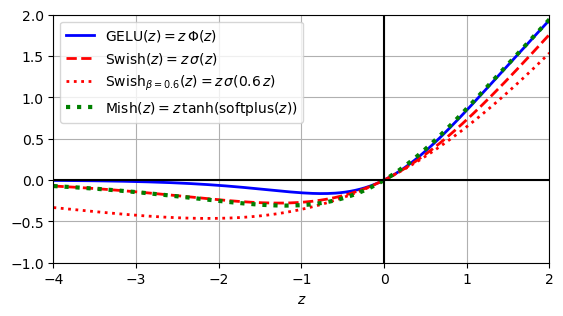

In [17]:
def swish(z, beta=1):
    return z * sigmoid(beta * z)

def approx_gelu(z):
    return swish(z, beta=1.702)

def softplus(z):
    return np.log(1 + np.exp(z))

def mish(z):
    return z * np.tanh(softplus(z))

z = np.linspace(-4, 2, 200)

beta = 0.6
plt.plot(z, approx_gelu(z), "b-", linewidth=2,
         label=r"GELU$(z) = z\,\Phi(z)$")
plt.plot(z, swish(z), "r--", linewidth=2,
         label=r"Swish$(z) = z\,\sigma(z)$")
plt.plot(z, swish(z, beta), "r:", linewidth=2,
         label=fr"Swish$_{{\beta={beta}}}(z)=z\,\sigma({beta}\,z)$")
plt.plot(z, mish(z), "g:", linewidth=3,
         label=fr"Mish$(z) = z\,\tanh($softplus$(z))$")
plt.plot([-4, 2], [0, 0], 'k-')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.axis([-4, 2, -1, 2])
plt.gca().set_aspect("equal")
plt.xlabel("$z$")
plt.legend(loc="upper left")

plt.show()


### Summary

1. **Sigmoid:**
   - Historically popular, but prone to causing vanishing gradients due to its output range (0,1) and saturation properties.

2. **Tanh:**
   - Similar to sigmoid but outputs values between (-1,1). It's zero-centered, which makes it slightly better than sigmoid but still susceptible to vanishing gradients.

3. **ReLU (Rectified Linear Unit):**
   - Addresses the vanishing gradient problem. However, it can lead to dead neurons, as it outputs zero for all negative inputs.

4. **Leaky ReLU:**
   - A variation of ReLU that allows small gradients for negative values, preventing dead neurons.

5. **PReLU (Parametric ReLU):**
   - An extension of Leaky ReLU where the small slope for negative values is learnable during training.

6. **ELU (Exponential Linear Unit):**
   - Similar to ReLU but smoothens the curve for negative values, reducing the vanishing gradient problem and dead neuron issue.

7. **SELU (Scaled Exponential Linear Unit):**
   - Self-normalizing property under specific conditions (with LeCun normal initialization). Helps maintain a mean of 0 and standard deviation of 1, reducing vanishing and exploding gradients.

8. **GELU (Gaussian Error Linear Unit):**
   - Non-linear activation function used in recent models like transformers, offering improved performance in certain tasks.

9. **Swish:**
   - A smooth, non-monotonic function that is similar to ReLU but uses a sigmoid function for negative values.

10. **Mish:**
    - A newer activation function that's similar to Swish but uses a softplus function instead of sigmoid.

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

### Best Practices

So, which activation function should you use for the hidden layers of your deep neural networks? ReLU remains a good default for simple tasks: it’s often just as good as the more sophisticated activation functions, plus it’s very fast to compute, and many libraries and hardware accelerators provide ReLU-specific optimizations. However, Swish is probably a better default for more complex tasks, and you can even try parametrized Swish with a learnable β parameter for the most complex tasks. Mish may give you very slightly better results, but it requires a bit more compute. If you care a lot about runtime latency, then you may prefer leaky ReLU, or parametrized leaky ReLU for more complex tasks. For deep MLPs, give SELU a try, but make sure to respect the constraints listed earlier. If you have spare time and computing power, you can use cross-validation to evaluate other activation functions as well.

</div>


## Batch Normalization

Another technique to help address the problem of exploding  / vanishing gradients is "batch normalization."  Batch Normalization (BN) improves the speed, performance, and stability of artificial neural networks. It addresses the issue of internal covariate shift, where the distribution of each layer's inputs changes during training, making the training process slower and more complicated.

#### Algorithm

Given a mini-batch of data (the set of training examples in each batch, usually 32), the algorithm normalizes the activations of each layer's inputs for each batch. The formal steps are as follows:

1. **Calculate Batch Mean:**
   - For a particular layer, calculate the mean of each feature across the mini-batch.
   - $ \mu_B = \frac{1}{m_B} \sum_{i=1}^{m_B} x_i $

2. **Calculate Batch Variance:**
   - Calculate the variance for each feature.
   - $ \sigma_B^2 = \frac{1}{m_B} \sum_{i=1}^{m_B} (x_i - \mu_B)^2 $

3. **Normalize:**
   - Normalize the batch using the mean and variance.
   - $ \hat{x_i} = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} $
   - $ \epsilon $ is a small constant added for numerical stability.

4. **Scale and Shift:**
   - Apply learnable scale and shift parameters to each normalized feature.
   - $ y_i = \gamma \hat{x_i} + \beta $
   - $ \gamma $ (scale) and $ \beta $ (shift) are parameters learned during training.

#### Handling Normalization During Test Time

During testing, you can't compute the mean and variance for each batch, as the batch size might differ, and you typically want deterministic outputs. Instead, you use the entire dataset's mean and variance estimated during training. In practice, a running average of the mean and variance is maintained during training and then used during testing.

#### Batch Normalization in Keras

In Keras, BN is typically implemented using the `BatchNormalization` layer.

**Placement of BN Layers:**

- **Before or After Activation:** There's debate over whether to apply BN before or after the activation function. The original paper suggests applying it before the activation functions, but empirical results show that both can work, depending on the situation.
- **Common Practice:** Often, BN is applied after the activation function for nonlinearity like ReLU. But when using BN with the ReLU activation function, applying BN before ReLU sometimes yields better results.

**Example Implementation in Keras:**

```python
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(300, activation="relu",
                            kernel_initializer="he_normal"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(100, activation="relu",
                            kernel_initializer="he_normal"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(10, activation="softmax")
  ])
```

To add the BN layers before the activation functions, you must remove the activation function from the hidden layers and add them as separate layers after the BN layers. Moreover, since a Batch Normalization layer includes one offset parameter per input, you can remove the bias term from the previous layer by passing use_bias=False when creating it. And lastly, you can usually drop the first BN layer to avoid sandwiching the first hidden layer between two BN layers. 

```python
 model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation("relu"),
      tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),    
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Activation("relu"),
      tf.keras.layers.Dense(10, activation="softmax")
]
```

**Hyperparameters**

Although BN will work without touching the hyperparameters, there are two to be aware of that might need tweaking.

### Momentum Hyperparameter

In the context of training neural networks, the term "momentum" refers to a technique used to accelerate the gradient descent algorithm, particularly addressing its issue of getting stuck in local minima and improving its speed of convergence.

#### How Momentum Works:

- **Combining Gradients:** Momentum takes into account the past gradients to smooth out the update steps. It does this by adding a fraction of the direction of the previous step to the current step. This approach can be visualized as a ball rolling down a hill, accumulating speed and momentum as it descends.
  
- **Formula:** If $ v $ represents the velocity (i.e., the amount to adjust the weights), $ \theta $ the parameters, $ \eta $ the learning rate, and $ \nabla_\theta J(\theta) $ the gradients of the cost function with respect to the parameters, then momentum modifies the update rule as:
  $$ v \leftarrow \beta v - \eta \nabla_\theta J(\theta) $$
  $$ \theta \leftarrow \theta + v $$
  Where $ \beta $ is the momentum hyperparameter (typically set between 0.9 and 0.99).

- **Benefits:** Momentum helps in faster convergence and dampens the oscillations in directions of high curvature, aiding smoother convergence.

### Axis Hyperparameter in Batch Normalization

The "axis" hyperparameter in batch normalization (BN) is crucial when working with multi-dimensional data like images (2D data).

#### Importance of Axis:

- **Purpose:** In BN, the "axis" parameter determines which axis should be normalized. This axis is typically the features/channels axis.
  
- **2D Data:** For 2D data (like images in CNNs), the features are usually the channels of the image (e.g., RGB channels). Therefore, it's essential to normalize across these channels.

- **Example:** In a 4D tensor for an image batch in TensorFlow (batch size, height, width, channels), the channels are usually the last dimension (axis=3). Batch Normalization will compute the mean and variance for each feature map across the batch and spatial dimensions (height and width), normalizing each feature map independently.

#### Implementation in Keras:

- When adding a `BatchNormalization` layer in Keras, you might set `axis=-1` for 2D image data, which means normalization is applied over the last dimension (channels).

```python
tf.keras.layers.BatchNormalization(axis=-1)
```

This normalization across the correct axis is essential for effective learning, as it ensures that the model is not biased towards specific channels and learns features uniformly across all channels of the input data.

### Conclusion

- **Momentum** in gradient descent helps in accelerating convergence and avoiding local minima by considering past gradients.
- The **Axis** parameter in Batch Normalization specifies the dimension over which normalization is to be applied, which is particularly important in multi-dimensional data like images to ensure uniform normalization across the correct features (e.g., channels in an image).




#### Performance and Role in Regularization

- **Training Speed:** BN can accelerate the training of deep networks by allowing the use of higher learning rates and reducing the sensitivity to weight initialization.
- **Regularization:** While not a substitute for dropout, BN provides a mild form of regularization, often reducing the need for dropout or other regularization techniques.
- **Effectiveness:** BN has been shown to be highly effective for deep networks and is widely used in state-of-the-art architectures.

Batch Normalization is a vital and ubiquitous component in modern neural network architectures. It stabilizes the learning process and can lead to significant improvements in training speed and overall performance. When implementing BN in Keras, the placement of BN layers (before or after activation functions) is an important consideration and can be guided by both the theoretical understanding of the network and empirical results.